# Image Classification in PyTorch

In this notebook, we are going to develop a neural network model for for image classification.

We will be working with the Fashion-MNIST dataset.

In [1]:
# Import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np 
import matplotlib.pyplot as plt
import time
import random
from sklearn import metrics

## 1. Load and visualise data.

The dataset is prepared in a similar way to MNIST. It is split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels.

There are in total 10 label classes, which are:
* 0: T-shirt/top
* 1: Trousers
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

In [2]:
# Load data
train_set = torchvision.datasets.FashionMNIST(root='.', download=True, train=True)
train_image = np.array(train_set.data)
train_label = np.array(train_set.targets)
class_name = train_set.classes

test_set = torchvision.datasets.FashionMNIST(root='.', download=True, train=False)
test_image = np.array(test_set.data)
test_label = np.array(test_set.targets)

0.1%

98.8%

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100.6%

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw


0.6%

98.8%

### Display the dimension of the training and test sets.

In [9]:
print(f"Shape of train_image: {train_image.shape}")
print(f"Shape of train_label: {train_label.shape}")
print(f"Shape of test_image: {test_image.shape}")
print(f"Shape of test_label: {test_label.shape}")

Shape of train_image: (60000, 28, 28)
Shape of train_label: (60000,)
Shape of test_image: (10000, 28, 28)
Shape of test_label: (10000,)


### Visualise sample images for each of the 10 classes.

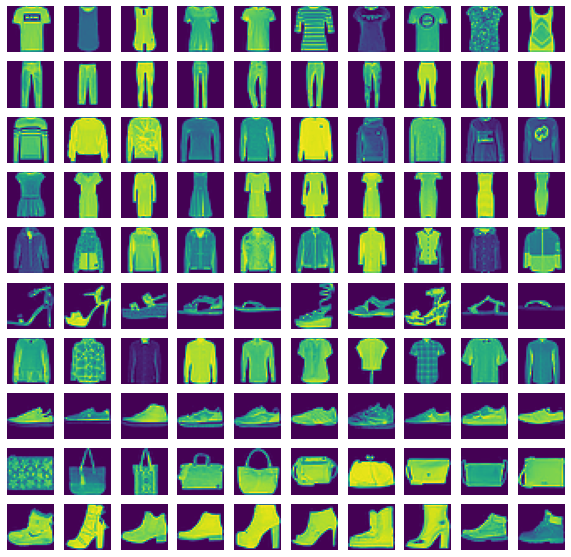

In [11]:
f, axarr = plt.subplots(10,10, figsize=(10,10))
counts = [0]*10
finished = False;
row = 0;

while(finished == False):
    image = train_image[row]
    label = train_label[row]
    
    if counts[label] < 10:
        axarr[label,counts[label]].imshow(train_image[row])
        axarr[label,counts[label]].axis('off')
        counts[label] += 1
    
    if counts == [10]*10:
        finished = True;
    else:
        row += 1 

### Display the number of training samples for each class.

In [5]:
unique, counts = np.unique(train_label, return_counts = True)
dictionary = dict(zip(unique, counts))
print("Number of training samples for each class:", dictionary)

Number of training samples for each class: {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


## 2. Image classification.

### Build a convolutional neural network using the `PyTorch` library to perform classification on the Fashion-MNIST dataset.